In [68]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("Iris.csv")
df=df.drop(df.columns[0], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

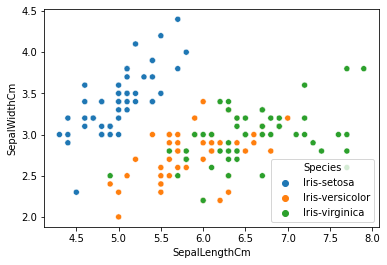

In [69]:
sns.scatterplot('SepalLengthCm', 'SepalWidthCm', data=df, hue='Species')

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='PetalLengthCm', ylabel='SepalWidthCm'>

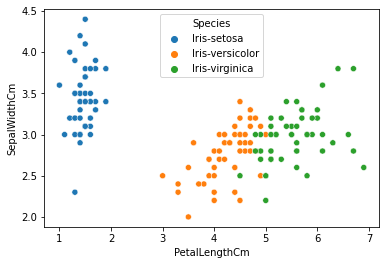

In [70]:
sns.scatterplot('PetalLengthCm', 'SepalWidthCm', data=df, hue='Species')

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='PetalWidthCm', ylabel='SepalWidthCm'>

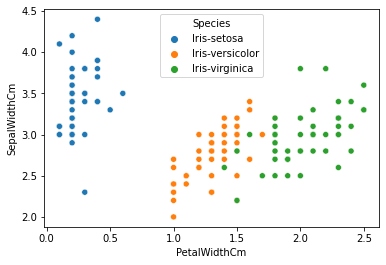

In [71]:
sns.scatterplot('PetalWidthCm', 'SepalWidthCm', data=df, hue='Species')

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

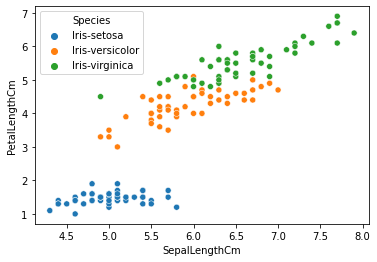

In [72]:
sns.scatterplot('SepalLengthCm', 'PetalLengthCm', data=df, hue='Species')

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

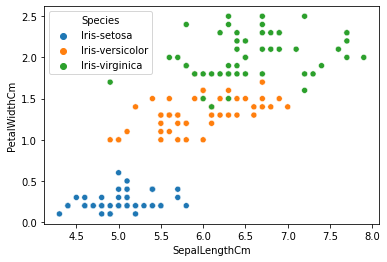

In [73]:
sns.scatterplot('SepalLengthCm', 'PetalWidthCm', data=df, hue='Species')

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

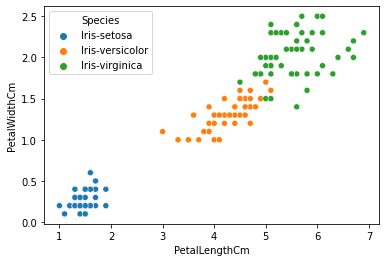

In [74]:
sns.scatterplot('PetalLengthCm', 'PetalWidthCm', data=df, hue='Species')

<AxesSubplot: >

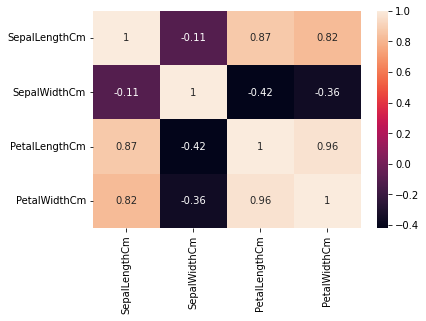

In [75]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True)

In [76]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
df=df.drop(df.columns[4], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# drop rows with missing values
df = df.dropna()

# select and standardize features
X = StandardScaler().fit_transform(df.values)

# choose number of components to be generated
nr_comps = 3
pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(X)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index=df.index)

pca_df.head()

,0,1,2
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428


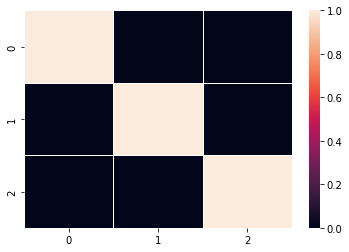

In [79]:
import matplotlib.pyplot as plt
ax = sns.heatmap(pca_df.corr() ,linewidth=1)
plt.show()

The Principle components are uncorrelated, showing that PCA has summarised all related information in a smaller number of variables. 

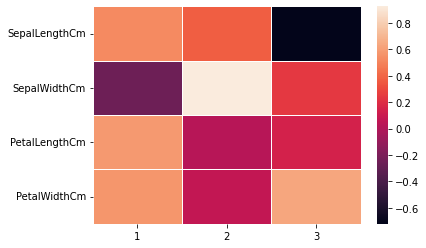

In [80]:
components = pd.DataFrame(pca.components_, columns=df.columns, index=range(1, nr_comps+1)).transpose()
ax = sns.heatmap(components,linewidth=1)
plt.show()

Figure above shows the correlations between the components and original variables using the components_ method of our PCA() object.

The original data had four features (sepal length, sepal width, petal length, and petal width), which were likely correlated with each other to some degree. PCA obtained three principal components that can explain most of the variation in the data. Redundancy in the original data is reduced as the original data was transformed into a lower-dimensional space.